<a href="https://colab.research.google.com/github/IcedTeague/Ensemble-Classifier-Project/blob/main/Ensemble_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Classifier Project
While there are many machine learning models that are used for various classification problems, there may be some scenarios where we want to utilize more than one model at the same time. This may be because we want to build in redundancies to confirm the findings of one model or to increase the performance of several models that may not be as accurate as we want them to be. There are several ways to implement an ensemble model, but I have chosen to use a voting method between three models: logistic regression, a simple neural network and k nearest neighbors. This involves training and testing these models individually and then choosing the most common answer among the three models. In order to test this strategy, we will use the sklearn breast cancer dataset, which is a common binary dataset used in testing machine learning classification.

(All cells must be run in order for the program to function)



In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import math
import random

data = load_breast_cancer()
x = np.array(data.data)
y = np.array(data.target)

norm_x = np.zeros_like(x)
rows , col = x.shape

#normalizes the inputs using min max normalization
for c in range(col):
  for r in range(rows):
    min_val = np.min(x[:, c])
    max_val = np.max(x[:, c])
    norm_x[r,c] = (x[r,c] - min_val) / (max_val - min_val)

x_train, x_test, y_train, y_test = train_test_split(norm_x, y, test_size=0.3)

print("Training and Test Data Created")

Training and Test Data Created


## Logistic Regression
The first model that will be used for classification is logistic regression. This form of regression is commonly used in binary classification problems due to prediction ranging between zero to one. While linear regression can be useful in some classification problems, it can struggle with binary classification problems as shown in the image below.
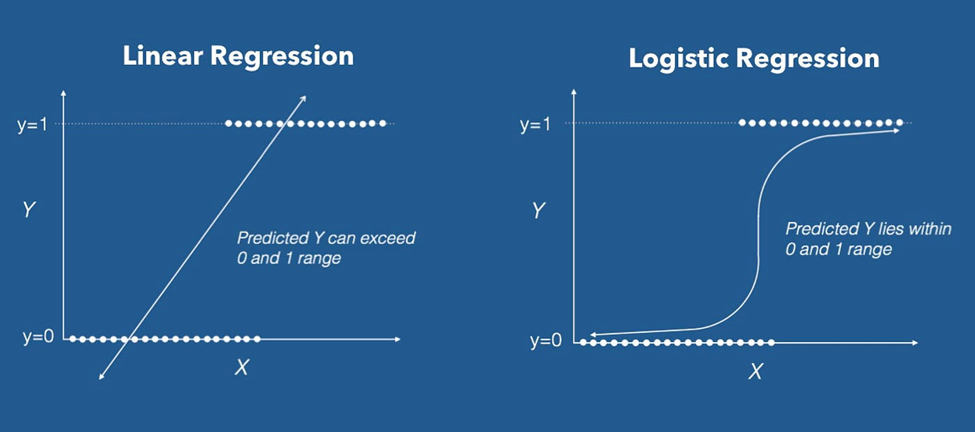
Source: Towards Data Science

Since logistic regression uses a sigmoid curve which is both nonlinear and fits between zero and one, it will be suitable for our specific classification problem and is our first model for our ensemble classifier.


In [2]:
#LOGISTIC REGRESSION
def logistic_reg(x_train,y_train,epoch,alpha):
  #initialize weight vector to zeros
  w = np.zeros_like(x_train[0,:])
  b = 0
  rows , col = x_train.shape

  #trains the weights the # of times listed in epoch
  for e in range(epoch):
    for i in range(rows):
      current_x = x_train[i,:]
      weighted_sum = current_x.dot(w) + b
      #applies the sigmoid function after computing the weighted sum
      y_hat = 1/(1+np.exp(-weighted_sum))
      error = y_hat - y_train[i]
      gradient_w = current_x.T * error
      gradient_b = error
      w = w - alpha * gradient_w
      b = b - alpha * gradient_b

  return w , b

#function to test the accuracy of the logistic regression
#if the output is greater than or equal to 0.5 then the guess is a one
#if the output is lower than 0.5 then the guess is a zero
def logistic_reg_test(x_test,y_test,weights,bias):
  accuracy = 0
  rows , col = x_test.shape
  for i in range(rows):
    print("\n")
    current_x = x_test[i,:]
    weighted_sum = current_x.dot(weights) + bias
    y_hat = 1/(1+np.exp(-weighted_sum))
    print("Raw Guess: "+str(y_hat))
    if y_hat >= 0.5:
      y_hat = 1
    else:
      y_hat = 0
    print("Rounded Guess: "+str(y_hat))
    if y_hat == y_test[i]:
      print("Correct!")
      accuracy += 1
    else:
      print("Incorrect")

  accuracy = accuracy / len(y_test)
  print("\n\nAccuracy: "+str(accuracy))

trained_weights , trained_bias = logistic_reg(x_train,y_train,5,0.05)
logistic_reg_test = logistic_reg_test(x_test,y_test,trained_weights,trained_bias)



Raw Guess: 0.5913133386800982
Rounded Guess: 1
Incorrect


Raw Guess: 0.8111423294225486
Rounded Guess: 1
Correct!


Raw Guess: 0.6076964048070955
Rounded Guess: 1
Correct!


Raw Guess: 0.8959090830567076
Rounded Guess: 1
Correct!


Raw Guess: 0.6880345898535204
Rounded Guess: 1
Correct!


Raw Guess: 0.968585251764289
Rounded Guess: 1
Correct!


Raw Guess: 0.5683978534818052
Rounded Guess: 1
Incorrect


Raw Guess: 0.9771087173026359
Rounded Guess: 1
Correct!


Raw Guess: 0.9246521994059556
Rounded Guess: 1
Correct!


Raw Guess: 0.7068316004391575
Rounded Guess: 1
Correct!


Raw Guess: 0.45770163827369914
Rounded Guess: 0
Correct!


Raw Guess: 0.9550780272521001
Rounded Guess: 1
Correct!


Raw Guess: 0.9467782083865264
Rounded Guess: 1
Correct!


Raw Guess: 0.8067657298787044
Rounded Guess: 1
Correct!


Raw Guess: 0.9176466968287563
Rounded Guess: 1
Correct!


Raw Guess: 0.07924186717409713
Rounded Guess: 0
Correct!


Raw Guess: 0.28813772211400224
Rounded Guess: 0
Correct!


Raw Gues

## Neural Network
The second model in our ensemble classifier is a simple neural network. Neural networks have been a crucial model in the field of machine learning and more advanced forms of neural networks (such as convolutional neural networks and transformers) have been used in everything from image classification to large language models such as Chat GPT and Google’s Gemini. However, luckily for us, this classification problem does not need a complicated network and only involves three main layers: the input layer, the output layer and one hidden layer as shown in the image below.

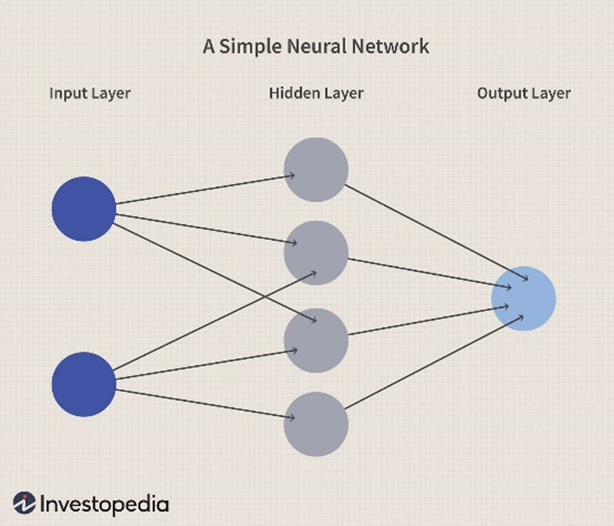

Source: Investopedia

The input and output layers are relatively straightforward. The input layer takes in each feature of the data and the output layer should give the correct classification of the data. However, it is the hidden layer and the weights connecting them that allow the model to “learn” how to classify data. When training a neural network, we compare the output layer’s answer with the actual correct classification. We then use this error to adjust the weights between each layer of the network which will allow our network to recognize patterns in the data in order to correctly identify new data.


In [3]:
#NEURAL NET

#functions for sigmoid/derivitive of sigmoid for
#activation and gradient descent calculation
def sigmoid(t):
  return 1 / (1 + np.exp(-t))

def sigmoid_derivitive(t):
  return t * (1 - t)

#function for a neural net that has an input layer,
#one hidden layer that can be set to any size (4 for assignment),
#and an output layer of one neuron (since final guess will be binary)
def neural_net(x_train,y_train,hidden_size,epoch,alpha):
  #initializes both weight vectors to zeros
  w1 = np.zeros([hidden_size,len(x_train[0])])
  b1 = 0
  w2 = np.zeros([1,hidden_size])
  b2 = 0
  rows , col = x_train.shape

  #trains the weights the # of times listed in epoch
  for e in range(epoch):
    for i in range(rows):
      current_x = x_train[i]

      h_ws = np.dot(w1, current_x) + b1
      h = sigmoid(h_ws)
      o_ws = np.dot(w2, h) + b2
      o = sigmoid(o_ws)
      o_error = sigmoid_derivitive(o) * (y_train[i] - o)
      h_s = o_error * h
      h_error = np.dot(sigmoid_derivitive(h), h_s)

      w2 += alpha * o_error * h
      w1 += alpha * np.outer(h_error, current_x)
      b2 += alpha * o_error
      b1 += alpha * h_error

  network = [w1,b1,w2,b2]
  return network

#function to test the accuracy of the neural network
#if the output is greater than or equal to 0.5 then the guess is a one
#if the output is lower than 0.5 then the guess is a zero
def test_neural_net(x_test,y_test,network):
    accuracy = 0
    rows , col = x_test.shape
    for i in range(rows):
      print("\n")
      current_x = x_test[i]

      h_ws = np.dot(network[0], current_x) + network[1]
      h = sigmoid(h_ws)
      o_ws = np.dot(network[2], h) + network[3]
      y_hat = sigmoid(o_ws)



      print("Raw Guess: "+str(y_hat))
      if y_hat >= 0.5:
        y_hat = 1
      else:
        y_hat = 0
      print("Rounded Guess: "+str(y_hat))
      if y_hat == y_test[i]:
        print("Correct!")
        accuracy += 1
      else:
        print("Incorrect")

    accuracy = accuracy / len(y_test)
    print("\n\nAccuracy: "+str(accuracy))


test_network = neural_net(x_train,y_train,4,15,0.05)
test_neural_net(x_test,y_test,test_network)



Raw Guess: [0.63544402]
Rounded Guess: 1
Incorrect


Raw Guess: [0.78454326]
Rounded Guess: 1
Correct!


Raw Guess: [0.63963443]
Rounded Guess: 1
Correct!


Raw Guess: [0.83784343]
Rounded Guess: 1
Correct!


Raw Guess: [0.68891868]
Rounded Guess: 1
Correct!


Raw Guess: [0.90398014]
Rounded Guess: 1
Correct!


Raw Guess: [0.64309842]
Rounded Guess: 1
Incorrect


Raw Guess: [0.91417618]
Rounded Guess: 1
Correct!


Raw Guess: [0.86246038]
Rounded Guess: 1
Correct!


Raw Guess: [0.70677899]
Rounded Guess: 1
Correct!


Raw Guess: [0.57148703]
Rounded Guess: 1
Incorrect


Raw Guess: [0.88544755]
Rounded Guess: 1
Correct!


Raw Guess: [0.87854302]
Rounded Guess: 1
Correct!


Raw Guess: [0.76921195]
Rounded Guess: 1
Correct!


Raw Guess: [0.85442607]
Rounded Guess: 1
Correct!


Raw Guess: [0.26886281]
Rounded Guess: 0
Correct!


Raw Guess: [0.46506896]
Rounded Guess: 0
Correct!


Raw Guess: [0.85068491]
Rounded Guess: 1
Correct!


Raw Guess: [0.77997043]
Rounded Guess: 1
Correct!


Raw Gue

## K-Nearest Neighbors

The final model we will use for our ensemble model is k nearest neighbors (KNN). This model takes the current point we are trying to predict and compares it to all the currently known points. We then take the k nearest neighbors (k being the number of closest points we want to compare to) and choose the most common class of these k points. While my implementation only uses a k of 1, the image below shows how higher orders of k would affect the model.

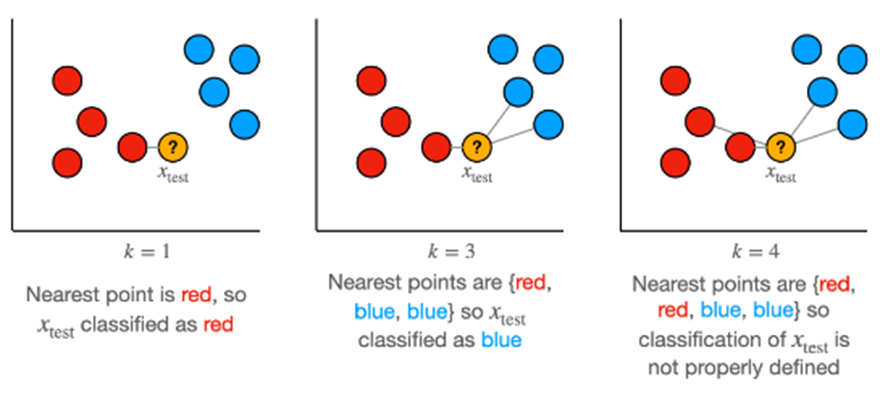

Source: Towards Data Science

In [4]:
#K NEAREST NEIGHBORS

#function for euclidean distance
def euclidean(i,j):
  total = 0
  for f in range(len(i)):
    total = total + ((i[f]-j[f])**2)
  return math.sqrt(total)

#function to determin the knn for a test input (designed only for k=1)
def knn(x_train, y_train, test):
  #initalizes the first min value and index to the euclidian distance between
  #test and x_train[0]
  min_index = 0
  min_value=euclidean(test, x_train[min_index])
  curr_index = 0
  #loops through the training dataset to find the minimum euclidan distance for
  #the test value
  for t in x_train:
    dis = euclidean(test, t)
    if  dis<min_value:
      min_value = dis
      min_index = curr_index
    curr_index = curr_index+1
  return y_train[min_index]

#function to test the accuracy of the knn implementation
def knn_accuracy(x_train, x_test, y_train, y_test):
  a = 0
  #tests all of the values in the test set and returns the accuracy
  for index in range(len(y_test)):
    guess = knn(x_train, y_train,x_test[index])
    if guess==y_test[index]:
      a=a+1
  return a/len(y_test)



knn_acc = knn_accuracy(x_train, x_test, y_train, y_test)

print("KNN Accuracy: "+str(knn_acc))

KNN Accuracy: 0.935672514619883


## Ensemble Classifier

Now that we have trained each model, we can combine them into an ensemble classifier. The data is fed into each of the three models we have trained. It will then pick the classification that the majority of the three models have voted on for its final answer.

In [5]:
#ENSEMBLE CLASSIFIER

#function combining 3 classifiers into an ensemble classifier,
#highest vote decides answer
def ensemble(x_train, x_test, y_train, y_test, weights, bias, network):
  accuracy = 0
  rows , col = x_test.shape
  for i in range(rows):
    #Logistic Regression
    current_x = x_test[i,:]
    weighted_sum = current_x.dot(weights) + bias
    guess = []
    y_hat = 1/(1+np.exp(-weighted_sum))
    if y_hat >= 0.5:
      guess.append(1)
    else:
      guess.append(0)

    #Nerual Net
    h_ws = np.dot(network[0], current_x) + network[1]
    h = sigmoid(h_ws)
    o_ws = np.dot(network[2], h) + network[3]
    y_hat = sigmoid(o_ws)
    if y_hat >= 0.5:
      guess.append(1)
    else:
      guess.append(0)

    #KNN
    guess.append(knn(x_train, y_train,x_test[i]))

    print("LR: ", guess[0])
    print("ANN: ", guess[1])
    print("KNN: ", guess[2])
    count = Counter(guess)
    vote = count.most_common(1)[0][0]
    print("Vote: ", vote)
    print("Answer: ", y_test[i])
    if vote == y_test[i]:
      print("Correct!")
      accuracy += 1
    else:
      print("Incorrect")
    print("\n\n")



  accuracy = accuracy / len(y_test)
  print("\n\nAccuracy: "+str(accuracy))


ensemble(x_train, x_test, y_train, y_test, trained_weights, trained_bias, test_network)

LR:  1
ANN:  1
KNN:  0
Vote:  1
Answer:  0
Incorrect



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  0
Vote:  1
Answer:  0
Incorrect



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  0
ANN:  1
KNN:  0
Vote:  0
Answer:  0
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  0
ANN:  0
KNN:  0
Vote:  0
Answer:  0
Correct!



LR:  0
ANN:  0
KNN:  0
Vote:  0
Answer:  0
Correct!



LR:  1
ANN:  1
KNN:  1
Vote:  1
Answer:  1
Correct!



LR:  1
A